In [1]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
text="""Please note that the find_start_time and find_end_time functions in the above example need to be implemented based on
how you determine the presence of a keyword in the video. This could be through keyword timestamps provided in the transcript or by
using audio analysis to detect keyword prominence.Keep in mind that this is a simplified example, and building a robust system for keyword extraction, video segmentation, and 
clip generation involves more advanced techniques and considerations. You might need to refine and customize these steps based on
your specific requirements and the tools you are using."""

In [3]:
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:


def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization
    words = nltk.word_tokenize(text)
    
    # Remove punctuation and numbers
    words = [word for word in words if word.isalpha()]
    
    # Remove HTML tags (if present)
    words = [re.sub(r'<.*?>', '', word) for word in words]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the processed words back into a string
    processed_text = ' '.join(words)
    
    return processed_text

processed_text = preprocess(text)
print(processed_text)


plea note findstarttim findendtim function exampl need implement base determin presenc keyword video could keyword timestamp provid transcript use audio analysi detect keyword prominencekeep mind simplifi exampl build robust system keyword extract video segment clip gener involv advanc techniqu consider might need refin custom step base specif requir tool use


In [5]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:

def extract_top_keywords(text, num_keywords=10):
    preprocessed_text = preprocess(text)
    # Create a TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features
    # Fit and transform the preprocessed text
    tfidf_matrix = tfidf_vectorizer.fit_transform([preprocessed_text])
    # Get feature names (words)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    # Convert TF-IDF matrix to DataFrame for better handling
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
    print(tfidf_df.shape)
    # Sort features by their TF-IDF scores
    sorted_features = tfidf_df.transpose().sort_values(by=0, ascending=False)
    # Get the top N keywords
    top_keywords = sorted_features.index[:num_keywords]
    keyword_df = pd.DataFrame({'keywords': top_keywords, 'values': sorted_features.loc[top_keywords, 0].values}).reset_index(drop=True)

    return keyword_df




In [48]:
def plot_keywords_barplot(keywords):
    plt.figure(figsize=(10, 6))
    plt.bar(keywords['keywords'], keywords['values'])
    plt.xlabel('Keywords')
    plt.ylabel('TF-IDF Score')
    plt.title('Top Keywords with TF-IDF Scores')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

top_keywords = extract_top_keywords(text)
print("Top Keywords:\n", top_keywords)


(1, 42)
Top Keywords:
          keywords    values
0         keyword  0.471405
1           video  0.235702
2            base  0.235702
3          exampl  0.235702
4            need  0.235702
5             use  0.235702
6          robust  0.117851
7            plea  0.117851
8         presenc  0.117851
9  prominencekeep  0.117851


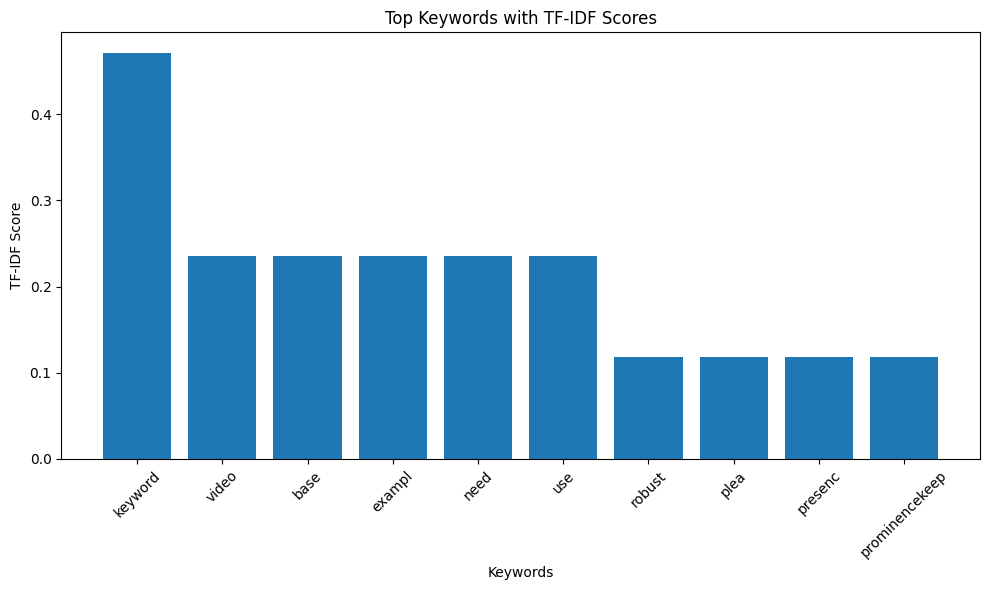

In [49]:
plot_keywords_barplot(top_keywords)

In [57]:
import subprocess
import youtube_dl

def download_video_audio(video_url, output_path):
    ydl_opts = {
        'format': 'bestaudio/best',
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'wav',
            'preferredquality': '192',
        }],
        'outtmpl': output_path,
    }
    with youtube_dl.YoutubeDL(ydl_opts) as ydl:
        ydl.download([video_url])





In [65]:
import subprocess
import os,sys

def transcribe_audio_with_whisper(audio_path):
    # Get the path to the directory containing this Python script
    script_dir = os.path.dirname(os.path.abspath(sys.argv[0]))
    
    # Construct the full path to whisper.py
    whisper_script = os.path.join(script_dir, "whisper.py")
    
    # Transcribe audio using Whisper
    transcription = subprocess.check_output([sys.executable, whisper_script, "transcribe", "--model", "whisper-large", audio_path])
    
    # Return the transcript
    return transcription.decode("utf-8")

# Replace "a.wav" with the actual audio file path
audio_path = "Trailer.wav"
transcription = transcribe_audio_with_whisper(audio_path)
print(transcription)


CalledProcessError: Command '['c:\\Users\\ASUS\\OneDrive\\Documents\\Projects\\VidSum-AI\\env\\python.exe', 'c:\\Users\\ASUS\\OneDrive\\Documents\\Projects\\VidSum-AI\\env\\Lib\\site-packages\\whisper.py', 'transcribe', '--model', 'whisper-large', 'Trailer.wav']' returned non-zero exit status 1.

In [64]:

transcription = transcribe_audio_with_whisper('Trailer.wav')

print(timestamps)

OSError: [WinError 193] %1 is not a valid Win32 application